In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Set random seed for reproducibility
np.random.seed(40)
#each time the code is run with the same seed, it will produce the same random numbers.


# Function to generate mock data for tasks and robots
def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations = np.random.randint(1, 11, size=num_tasks)  # Random task durations between 1 and 10 hours
    task_priorities = np.random.randint(1, 6, size=num_tasks)  # Random task priorities between 1 and 5
    robot_efficiencies = [0.1,0.0002,0.3,0.4,0.5 ]  # Random robot efficiencies between 0.5 and 1.5
    return task_durations, task_priorities, robot_efficiencies




In [11]:
# The fitness is calculated based on the total time taken by the robots to complete the tasks,
# considering their efficiencies and task priorities. The fitness value is higher for solutions
# with lower total production time and balanced workload across robots.

def fitness_function(population, task_durations, task_priorities, robot_efficiencies):
    fitness =[]
    total_robot = len(robot_efficiencies)

    for i in range(len(population)):
        present_population = population[i] # taking each Individual
        Tr = np.zeros(total_robot, dtype=int) # array filled with zeros for: total time taken by a robot to complete its assigned tasks.
        #here, Tr= total production time


        for j in range(len(present_population)):
            task = j  # taking each number of each Individual
            robot = present_population[task]
            td = task_durations[task]
            tp = task_priorities[task]
            re = robot_efficiencies[robot]
            Tr[robot] = Tr[robot] + ((td * tp) / re)
        Ttotal = np.max(Tr)


        # Workload Balance (B)
        B = np.std(Tr)

        # fitness.append((Ttotal + B))
        fitness.append(1/(Ttotal + B))  #inverse


    return fitness




In [12]:
def select_parents(population, fitness):

    select = np.random.randint(1, int(len(population)/2))  # 1 to top half population

    parents = []

    for _ in range(select):
        max_fitness_idx = np.argmax(fitness)  # index of the maximum value in the fitness list.
        parents.append(population[max_fitness_idx])
        fitness[max_fitness_idx] = -np.inf  #  ensures that the selected individual will not be chosen as a parent so this individual is not selected again

    return parents


In [13]:
def crossover(p, num_chield):    # num_chield = population_size / 2


    chield = []
    for _ in range(num_chield):

        crossover_point = np.random.randint(1, len(p[0]))

        p1 = np.random.randint(0, len(p))
        p2 = np.random.randint(0, len(p))

        c11 = p[p1][0:crossover_point]  # 0 theke crossover_point
        c12 = p[p2][crossover_point:]   # crossover_point theke last

        c21 = p[p2][0:crossover_point]
        c22 = p[p1][crossover_point:]

        chield.append(np.concatenate((c11, c12)))
        chield.append(np.concatenate((c21, c22)))



    return chield


In [14]:
#changes a single gene in each chield randomly.

def mutation(chield, mutation_rate):

    for idx in range(len(chield)):
        for _ in range(int(len(chield[idx])*mutation_rate)):
            T1 = np.random.randint(0, len(chield[idx]))
            T2 = np.random.randint(0, len(chield[idx]))
            chield[idx][T1]= chield[idx][T2]
            chield[idx][T2]= chield[idx][T1]
            # chield[idx][T1], chield[idx][T2] = chield[idx][T2] , chield[idx][T1]
    return chield


In [15]:

# GA algorithm placeholder for students to implement their solution
def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies):
    population_size = 100  #indicating the number of individuals (solutions) in each generation.
    generation = 1000
    mutation_rate = 0.1  #

    # Placeholder for the initial population generation

    population = []

    for _ in range(population_size):
        individual = np.random.randint(0, len(robot_efficiencies), size=len(task_durations))
        population.append(individual)

    # Print population

    for idx, individual in enumerate(population):
        print(f"Individual {idx + 1}: {individual}")

    for _ in range(generation):
        # Placeholder for the fitness function calculation
        fitness = fitness_function(population, task_durations, task_priorities, robot_efficiencies)

        # Placeholder for the selection process
        parents = select_parents(population, fitness)

        # Placeholder for the crossover operation
        select = np.random.randint(1, int(len(population)/2))
        chield = crossover(parents, int(population_size / 2 ))
        # # Placeholder for the mutation operation

        # Create the new population by combining parents and chield
        # population = parents + chield

        population = mutation(chield, mutation_rate)
    # Example of a random solution for demonstration purposes

    fitness = fitness_function(population, task_durations, task_priorities, robot_efficiencies)


    # print(fitness[np.argmin(fitness)])
    # best_solution = population[np.argmin(fitness)]

    print("Fitness: ",fitness[np.argmax(fitness)])
    best_solution = population[np.argmax(fitness)]

    return best_solution



In [16]:
def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies):
    # Create a grid for visualization based on the solution provided
    grid = np.zeros((len(robot_efficiencies), len(task_durations)))
    for task_idx, robot_idx in enumerate(solution):
        grid[robot_idx, task_idx] = task_durations[task_idx]

    fig, ax = plt.subplots(figsize=(12, 6))  #size of the figure in inches.
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "blue"])  # Custom colormap
    #white for low values (no task assigned) and blue for high values (task assigned).

    # Display the grid with task durations
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotate each cell with task priority and duration
    for i in range(len(task_durations)):
        for j in range(len(robot_efficiencies)):

            # Determine text color based on task duration and assignment
            if grid[j, i] > 0 and task_durations[i] >= 5:
                text_color = 'white'  # White text for assigned tasks with duration >= 5
            else:
                text_color = 'black'  # Black text for unassigned tasks or tasks with duration < 5

            # Construct annotation text
            text = f'Priority:{task_priorities[i]}\n\n{task_durations[i]}Hours'

            # Add annotation to the plot
            ax.text(i, j, text, va='center', ha='center', color=text_color)


    # Set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_durations))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    # Create a legend for task priorities
    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    plt.tight_layout()
    plt.show()


Individual 1: [3 3 1 0 1 1 0 4 4 4]
Individual 2: [0 2 2 3 3 3 1 3 4 2]
Individual 3: [2 2 3 4 4 1 3 3 2 2]
Individual 4: [2 4 0 1 4 1 3 3 0 1]
Individual 5: [3 2 2 1 1 3 4 4 2 0]
Individual 6: [0 1 1 4 0 1 2 0 4 2]
Individual 7: [3 4 2 1 2 3 3 1 0 0]
Individual 8: [3 2 2 4 1 2 3 4 3 4]
Individual 9: [2 3 4 1 4 2 0 0 3 3]
Individual 10: [0 2 1 2 3 4 0 3 3 4]
Individual 11: [1 2 3 2 3 2 1 3 2 1]
Individual 12: [0 1 2 0 0 0 4 0 3 3]
Individual 13: [1 2 1 3 1 4 3 0 1 1]
Individual 14: [4 2 0 0 0 2 2 1 2 0]
Individual 15: [3 0 0 3 4 0 2 0 3 2]
Individual 16: [1 4 3 2 1 4 3 3 4 2]
Individual 17: [3 4 1 1 4 1 0 3 2 4]
Individual 18: [1 2 4 1 4 4 1 0 1 1]
Individual 19: [0 3 0 2 4 4 0 3 2 1]
Individual 20: [0 0 1 1 4 4 3 0 0 1]
Individual 21: [1 2 1 4 2 0 1 2 1 0]
Individual 22: [4 0 1 1 0 0 3 0 0 0]
Individual 23: [3 2 0 1 1 0 0 4 2 1]
Individual 24: [4 0 3 3 4 3 3 1 3 3]
Individual 25: [1 2 4 4 2 2 3 4 1 0]
Individual 26: [1 1 1 3 0 2 0 1 0 1]
Individual 27: [3 3 2 1 1 4 3 1 0 0]
Individual

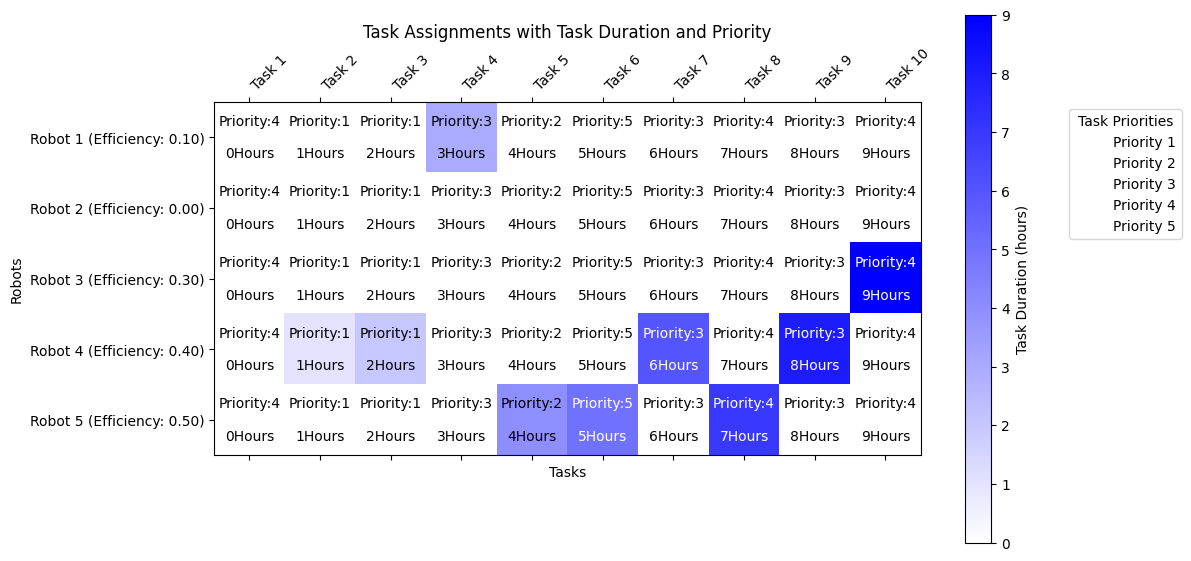

robot_efficiencies:  [0.1, 0.0002, 0.3, 0.4, 0.5]
task_durations:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
task_priorities:  [4 1 1 3 2 5 3 4 3 4]


In [17]:
# Main execution
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)

    # Run GA to find the best solution
    best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies)
    print(f"best_solution: {best_solution}")

    # Visualize the initial random assignment
    visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies)



print("robot_efficiencies: ",robot_efficiencies)
print("task_durations: ",task_durations)
print("task_priorities: ",task_priorities)


